# Dataset Description

Mammography is the most effective method for breast cancer screening available today. However, the low
positive predictive value of breast biopsy resulting from mammogram interpretation leads to approximately
70% unnecessary biopsies with benign outcomes. To reduce the high number of unnecessary breast biopsies,
several computer-aided diagnoses (CAD) systems have been proposed in the last years.

 These systems help
physicians in their decision to perform a breast biopsy on a suspicious lesion seen in a mammogram or to
perform a short-term follow-up examination instead

The BI-RADS score is an acronym for the Breast Imaging Reporting and Database System score. It's a scoring system radiologists use to describe mammogram results. A mammogram is an X-ray imaging test that examines breast health.

### Objective: Building a model where we want to suggest a doctor to refer the patient for biopsy or not.

#    Attribute Information:
1. BI-RADS assessment: 1 to 5 (ordinal, non-predictive!)

2. Age: patient's age in years (integer)

3. Shape: mass shape:
    lobular=1  oval=2  irregular=3  round=4 (nominal)
    
4. Margin: mass margin:
    circumscribed=0    ill-defined=1    microlobulated=2    obscured=3   spiculated=4 (nominal)
    
5. Density: mass density 
    high=1 iso=2 low=3 fat-containing=4 (ordinal)
    
6. Severity: benign=0 or malignant=1 (binominal, goal field!)

If severity is 1 then the doctor suggests the patient to go for biopsy

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the train and test data to merge them and remove the missing values from them.
data_train= pd.read_excel("D:/iAnalyst/Machine Learning/Task from scratch/Breast Cancer/Train.xlsx")
data_test= pd.read_excel("D:/iAnalyst/Machine Learning/Task from scratch/Breast Cancer/Test.xlsx")
data= data_train.merge(data_test,  how='outer')
df=data.copy()
df.head()

,Index,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
0,1,5.0,67.0,lobular,spiculated,low,1
1,2,4.0,43.0,round,circumscribed,NaN,1
2,3,5.0,58.0,irregular,spiculated,low,1
3,4,4.0,28.0,round,circumscribed,low,0
4,5,5.0,74.0,round,spiculated,NaN,1


In [3]:
df.describe()

,Index,BI_RADS,Age,Severity
count,960.000000,958.000000,861.000000,960.000000
mean,354.705208,4.347599,55.860627,0.462500
std,246.942833,1.783838,16.969647,0.498852
min,1.000000,0.000000,5.000000,0.000000
25%,121.000000,4.000000,45.000000,0.000000
50%,331.500000,4.000000,56.000000,0.000000
75%,571.250000,5.000000,66.000000,1.000000
max,811.000000,55.000000,130.000000,1.000000


#### The 5 point statistical summary indicates that there are no outliers.

In [4]:
#Checking for missing values
df.isnull().sum()

Index            0
BI_RADS          2
Age             99
Shape           31
Margin          48
Mass_Density    76
Severity         0
dtype: int64

Filling missing values in Age and BI-RADS according to severity

In [5]:
A1 = df[df.Severity==1].Age.median()  #63
A0 = df[df.Severity==0].Age.median()  #50
df.loc[((df['Age'].isnull()) & (df['Severity'] == 1)), 'Age'] = A1
df.loc[((df['Age'].isnull()) & (df['Severity'] == 0)), 'Age'] = A0

df['BI_RADS'].fillna(value = df['BI_RADS'].median(), inplace= True)

Filling missing values in shape, margin, mass density according to severity

In [6]:
Sh1 = df[df.Severity==1].Shape.mode()[0]   #irregular
Sh0 = df[df.Severity==0].Shape.mode()[0]   #round
df.loc[((df['Shape'].isnull()) & (df['Severity'] == 1)), 'Shape'] = Sh1
df.loc[((df['Shape'].isnull()) & (df['Severity'] == 0)), 'Shape'] = Sh0

M1 = df[df.Severity==1].Margin.mode()[0]  
M0 = df[df.Severity==0].Margin.mode()[0]  
df.loc[((df['Margin'].isnull()) & (df['Severity'] == 1)), 'Margin'] = M1
df.loc[((df['Margin'].isnull()) & (df['Severity'] == 0)), 'Margin'] = M0

Md1 = df[df.Severity==1].Mass_Density.mode()[0]  
Md0 = df[df.Severity==0].Mass_Density.mode()[0]  
df.loc[((df['Mass_Density'].isnull()) & (df['Severity'] == 1)), 'Mass_Density'] = M1
df.loc[((df['Mass_Density'].isnull()) & (df['Severity'] == 0)), 'Mass_Density'] = M0

df.isnull().sum()  #No missing values!!

Index           0
BI_RADS         0
Age             0
Shape           0
Margin          0
Mass_Density    0
Severity        0
dtype: int64

Imputed all the missing values by the median or the mode

<AxesSubplot:title={'center':'Frequency of Shape'}>

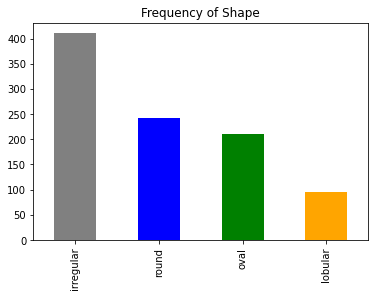

In [7]:
shape = df['Shape'].value_counts()
shape.plot.bar(title= 'Frequency of Shape', color= ['grey', 'blue', 'green', 'orange'])

<AxesSubplot:title={'center':'Frequency of Shape'}>

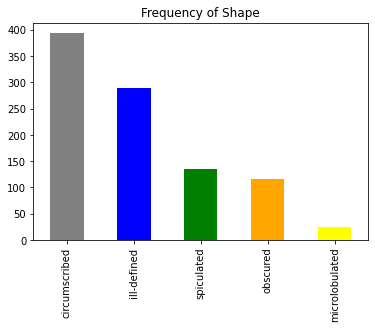

In [8]:
margin = df['Margin'].value_counts()
margin.plot.bar(title= 'Frequency of Margin', color= ['grey', 'blue', 'green', 'orange','yellow'])

<AxesSubplot:title={'center':'Frequency of Shape'}>

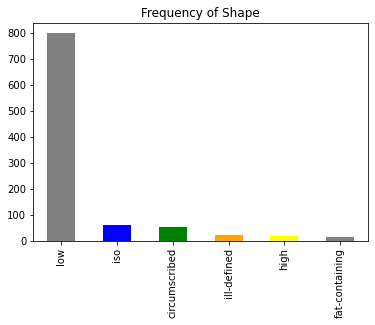

In [9]:
massdensity = df['Mass_Density'].value_counts()
massdensity.plot.bar(title= 'Frequency of Shape', color= ['grey', 'blue', 'green', 'orange', 'yellow'])

(array([516.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 444.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

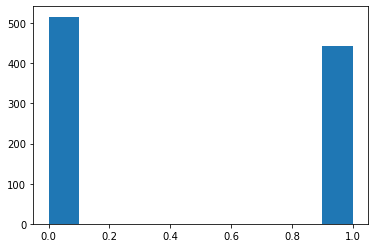

In [10]:
plt.hist(df['Severity'])

#### From the above graph we come to know that the data is almost balanced.

# Plots based on Severity

<AxesSubplot:title={'center':'Sub-divided bar plot of Shape'}, xlabel='Shape'>

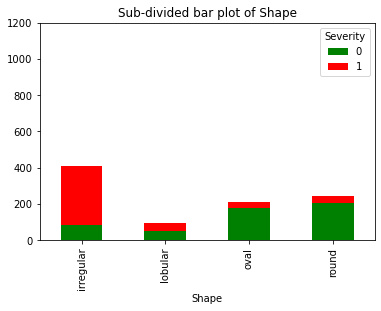

In [11]:
t1=pd.crosstab(df.Shape,df.Severity)
t1.plot.bar(stacked=True,title='Sub-divided bar plot of Shape',color=['green','red'],
            ylim=[0,1200],legend=True)

<AxesSubplot:title={'center':'Sub-divided bar plot of Margin'}, xlabel='Margin'>

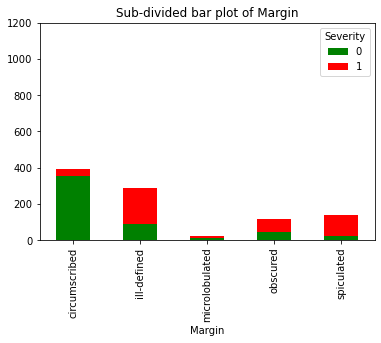

In [12]:
t1=pd.crosstab(df.Margin,df.Severity)
t1.plot.bar(stacked=True,title='Sub-divided bar plot of Margin',color=['green','red'],
            ylim=[0,1200],legend=True)

<AxesSubplot:title={'center':'Sub-divided bar plot of Mass_Density'}, xlabel='Mass_Density'>

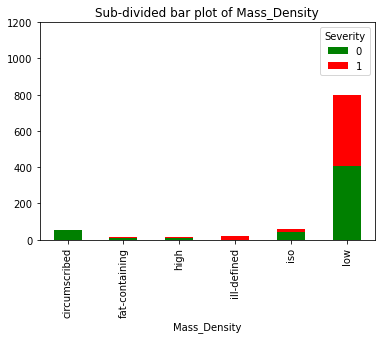

In [13]:
t1=pd.crosstab(df.Mass_Density,df.Severity)
t1.plot.bar(stacked=True,title='Sub-divided bar plot of Mass_Density',color=['green','red'],
            ylim=[0,1200],legend=True)

# Label Encoding

In [14]:
##Use label hot encoding on Shape, margin and density
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['Shape']= label_encoder.fit_transform(df['Shape'])
df['Margin']= label_encoder.fit_transform(df['Margin'])
df['Mass_Density']= label_encoder.fit_transform(df['Mass_Density'])
df

,Index,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
0,1,5.0,67.0,1,4,5,1
1,2,4.0,43.0,3,0,3,1
2,3,5.0,58.0,0,4,5,1
3,4,4.0,28.0,3,0,5,0
4,5,5.0,74.0,3,4,3,1
...,...,...,...,...,...,...,...
955,146,4.0,47.0,2,0,5,0
956,147,4.0,56.0,0,4,5,1
957,148,4.0,64.0,0,4,5,0
958,149,5.0,66.0,0,4,5,1


Text(0.5, 1.0, 'abs')

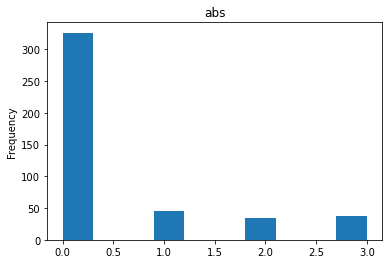

In [15]:
data2= df[df['Severity']==1]['Shape']
data2.plot(kind ='hist')
plt.title("abs")

<AxesSubplot:title={'center':'Boxplot for Shape when Severity is malignant'}>

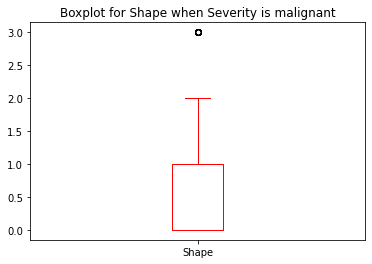

In [16]:
a=df[df['Severity']==1]['Shape']    
a.plot.box(color='red',title='Boxplot for Shape when Severity is malignant')

<AxesSubplot:title={'center':'Boxplot for Shape when Severity is benign'}>

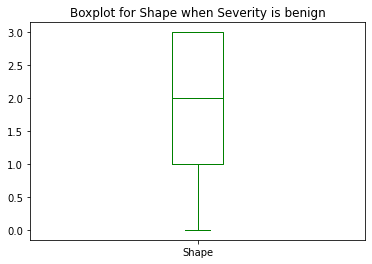

In [17]:
a=df[df['Severity']==0]['Shape']    
a.plot.box(color='green',title='Boxplot for Shape when Severity is benign')

<AxesSubplot:title={'center':'Boxplot for Mass when Severity is malignant'}>

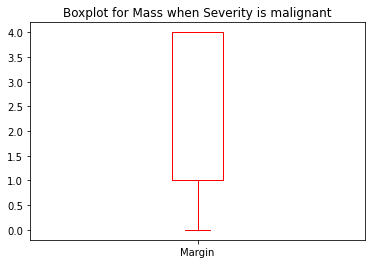

In [18]:
a=df[df['Severity']==1]['Margin']    
a.plot.box(color='red',title='Boxplot for Mass when Severity is malignant')

<AxesSubplot:title={'center':'Boxplot for Mass when Severity is benign'}>

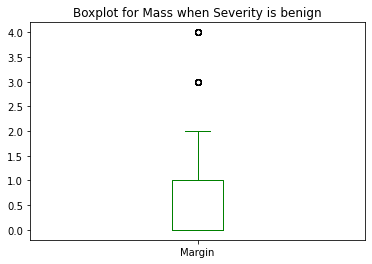

In [19]:
a=df[df['Severity']==0]['Margin']    
a.plot.box(color='green',title='Boxplot for Mass when Severity is benign')

# Train Test Split

In [20]:
X= df.drop('Severity', axis=1)
y= df['Severity']

#Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Logistic

In [21]:
#Logistic 

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test) 
#predictions = logmodel.predict_proba(X_test)

C:\Users\Vineet\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
#Evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))


[[86 22]
 [15 69]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       108
           1       0.76      0.82      0.79        84

    accuracy                           0.81       192
   macro avg       0.80      0.81      0.81       192
weighted avg       0.81      0.81      0.81       192



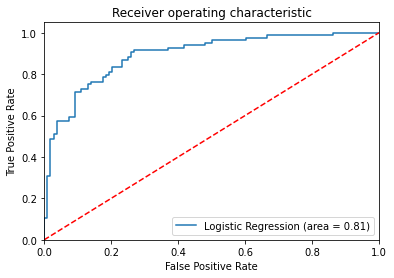

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, predictions)
logit_roc_auc

fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

# Using KNN with standardizing

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  #Standard Scalar converts the variables/features to N(0,1) i.e. mu+-3(sigma)^sq. It's range will be from -3 to +3

scaler.fit(df.drop('Severity',axis=1))

scaled_features = scaler.transform(df.drop('Severity',axis=1))

df_feat = pd.DataFrame(scaled_features,columns=df.columns[:6])
df_feat.head()

,Index,BI_RADS,Age,Shape,Margin,Mass_Density
0,-1.433083,0.366694,0.689218,-0.237638,1.869606,0.377965
1,-1.429031,-0.194751,-0.792777,1.357692,-0.881079,-1.169356
2,-1.424980,0.366694,0.133470,-1.035302,1.869606,0.377965
3,-1.420928,-0.194751,-1.719024,1.357692,-0.881079,0.377965
4,-1.416876,0.366694,1.121466,1.357692,1.869606,-1.169356


In [25]:
from sklearn.model_selection import train_test_split

X=df_feat
y=df['Severity']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3,p=2) #when p=2 (default), it is Euclidean  distance. The general form is the Minkowski distance
print(knn)

knn.fit(X_train,y_train)

pred = knn.predict(X_test)

print(classification_report(y_test,pred))

roc_auc_score(y_test, pred)

KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       108
           1       0.83      0.87      0.85        84

    accuracy                           0.86       192
   macro avg       0.86      0.87      0.86       192
weighted avg       0.87      0.86      0.86       192



0.8650793650793651

ROC score for k=  1 is: 0.8042328042328042
ROC score for k=  2 is: 0.8167989417989419
ROC score for k=  3 is: 0.8650793650793651
ROC score for k=  4 is: 0.8267195767195767
ROC score for k=  5 is: 0.8425925925925926
ROC score for k=  6 is: 0.8293650793650794
ROC score for k=  7 is: 0.8333333333333334
ROC score for k=  8 is: 0.832010582010582
ROC score for k=  9 is: 0.8300264550264551
ROC score for k=  10 is: 0.8333333333333334
ROC score for k=  11 is: 0.835978835978836
ROC score for k=  12 is: 0.8392857142857143
ROC score for k=  13 is: 0.8253968253968255
ROC score for k=  14 is: 0.8240740740740742
ROC score for k=  15 is: 0.8220899470899471
ROC score for k=  16 is: 0.8075396825396826
ROC score for k=  17 is: 0.8101851851851852
ROC score for k=  18 is: 0.8029100529100529
ROC score for k=  19 is: 0.8148148148148149
ROC score for k=  20 is: 0.8075396825396826


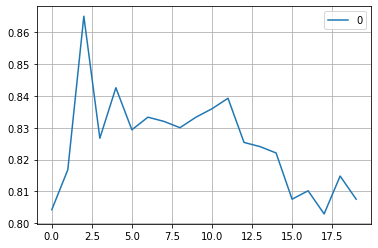

In [27]:
roc_val= []
for K in range(20):
    K = K+1
    knn = KNeighborsClassifier(n_neighbors=K,p=2)

    knn.fit(X_train, y_train)  #fit the model
    pred=knn.predict(X_test) #make prediction on test set
    score= roc_auc_score(y_test, pred) #roc scores
    roc_val.append(score)
    print('ROC score for k= ' , K , 'is:', score)
    
curve = pd.DataFrame(roc_val) 
curve.plot()
plt.grid()

#Here we can see that that after arouns K>3 the error rate just tends to decline. So we will finalize k=3 as after 3 error declines. Let's retrain the model with that and check the classification report!



In [28]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL 
K=3
knn = KNeighborsClassifier(n_neighbors=K,p=2)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K={} \n'.format(K))
print(roc_auc_score(y_test, pred))

WITH K=3 

0.8650793650793651


# Decision Tree



In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

dt = DecisionTreeClassifier(min_samples_split=35, random_state=50)  #Getting best accuracy when 35
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("Training Accuracy :", dt.score(X_train, y_train))
print("Testing Accuaracy :", dt.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

print(roc_auc_score(y_pred, y_test))

Training Accuracy : 0.8671875
Testing Accuaracy : 0.8489583333333334
[[94 14]
 [15 69]]
0.8468553111528684


# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(min_samples_split=15, random_state=50)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Training Accuracy :", rf.score(X_train, y_train))
print("Testing Accuracy :", rf.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

print(roc_auc_score(y_pred, y_test))

Training Accuracy : 0.90234375
Testing Accuracy : 0.8645833333333334
[[93 15]
 [11 73]]
0.8618881118881119


# AdaBoost model

In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

ada = AdaBoostClassifier(n_estimators=50,learning_rate=1,random_state=50)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print(accuracy_score(y_test, y_pred))

print(classification_report(y_test,y_pred))
roc_auc_score(y_test, ada.predict(X_test))

0.8541666666666666
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       108
           1       0.82      0.86      0.84        84

    accuracy                           0.85       192
   macro avg       0.85      0.85      0.85       192
weighted avg       0.86      0.85      0.85       192



0.8544973544973545

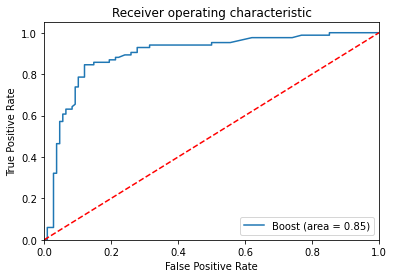

In [32]:
Boost_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Boost (area = %0.2f)' % Boost_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

# Gradient Boosting model

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100,max_depth=2, random_state=50)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print(accuracy_score(y_test, y_pred))

print(classification_report(y_test,y_pred))
roc_auc_score(y_test, gb.predict(X_test))

0.859375
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       108
           1       0.84      0.85      0.84        84

    accuracy                           0.86       192
   macro avg       0.86      0.86      0.86       192
weighted avg       0.86      0.86      0.86       192



0.8578042328042328

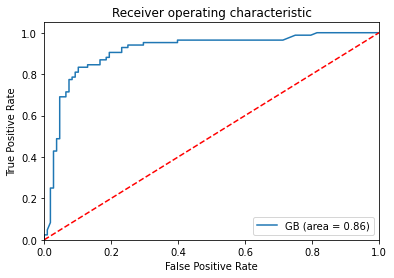

In [34]:
GB_roc_auc = roc_auc_score(y_test, gb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='GB (area = %0.2f)' % GB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

# Support Vector Machine

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix

svc = SVC(kernel = 'rbf', random_state=50)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print("Training Accuracy :", svc.score(X_train, y_train))
print("Testing Accuracy :", svc.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)
roc_auc_score(y_pred, y_test)


Training Accuracy : 0.8489583333333334
Testing Accuracy : 0.8333333333333334
[[88 20]
 [12 72]]


0.831304347826087

Text(0.5, 1.0, 'Receiver operating characteristic')

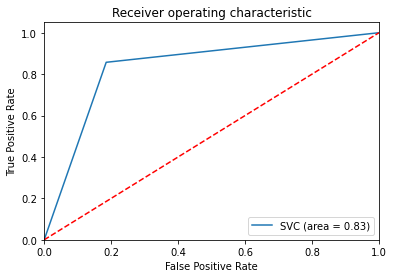

In [36]:
SVC_roc_auc =roc_auc_score(y_pred, y_test)

fpr, tpr,threshold = roc_curve(y_test, svc.predict(X_test))   #this fn returns 3 values. thats why 3 names  
plt.figure()
plt.plot(fpr, tpr, label='SVC (area = %0.2f)' % SVC_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc="lower right")

plt.xlim([0.0, 1.0])          #can be used to set or get limits for X-axis
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

In [37]:
# k fold cross validation

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator =logmodel, X = X_train, y = y_train, cv = 10, scoring='roc_auc', n_jobs=-1)   

#cross_val_score(rf, X_train, y_train, scoring='roc_auc' n_jobs=-1) 
#Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options for scoring.
print(cvs)

print("Mean Accuracy :", cvs.mean())
print("Variance :", cvs.std())


[0.96409214 0.89566396 0.92750678 0.899729   0.86314363 0.899729
 0.91056911 0.88211382 0.91666667 0.85      ]
Mean Accuracy : 0.900921409214092
Variance : 0.03072893503026971


In [43]:
import pickle
# Save to file in the current working directory
pkl_filename = "Model_BC_ADA.pkl"
with open(pkl_filename, 'wb') as file:  #wb= write binary
    pickle.dump(ada, file)